
<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

This is a fictional data set created by IBM data scientists. Uncover the factors that lead to employee attrition and explore related human resource questions we need to analyze employee information.
 Typically job class specs have information which characterize the job class- its features, and a label- in this case a pay grade - something to predict that the features are related to.

<u>Content</u>

The data is a static snapshot. The contents are

<ol>
<li>Age</li>
    <li>Attrition <b>Target variable</b></li>
<li>BusinessTravel</li>
<li>DailyRate</li>
<li>    Department</li>
<li>    DistanceFromHome</li>
<li>    Education</li>
<li>    EducationField</li>
<li>    EmployeeCount</li>
<li>    EmployeeNumber</li>
<li>    EnvironmentSatisfaction</li>
<li>    Gender</li>
<li>    HourlyRate</li>
<li>    JobInvolvement</li>
<li>    JobLevel</li>
<li>    JobRole</li>
<li>    JobSatisfaction</li>
<li>    MaritalStatus</li>
<li>    MonthlyIncome</li>
<li>    MonthlyRate</li>
<li>    NumCompaniesWorked</li>
<li>    Over18</li>
<li>    OverTime</li>
<li>    PercentSalaryHike</li>
<li>    PerformanceRating</li>
<li>    RelationshipSatisfaction</li>
<li>    StandardHours</li>
<li>    StockOptionLevel</li>
<li>    TotalWorkingYears</li>
<li>    TrainingTimesLastYear</li>
<li>    WorkLifeBalance</li>
<li>    YearsAtCompany</li>
<li>    YearsInCurrentRole</li>
<li>    YearsSinceLastPromotion</li>
<li>    YearsWithCurrManager</li>
</ol>

<u>Acknowledgements</u>

This data is purely fictional

 <u>Inspiration</u>

The intent is to use machine learning classification algorithms to predict the attrition variable from the educational level to financial budget information.
    
</div>

<div class="alert alert-info"><b>Task</b>
    
Typically attrition detection in HR is time consuming and cumbersome as a manual activity. The intent is to show how machine learning and People Analytics can be brought to bear on this task.
    
To this aim, read the dataset, locate the target variable, explore your dataset, filter out unnecessary columns, preprocess the remaining columns, create a classifier, and evaluate its results.
          
</div>

## Readying the workspace by importing libraries

In [89]:
#Dataset name "hackathon_1_sec_B.csv"
#importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [90]:
#Creating a dataframe with the entire dataset
df_new = pd.read_csv("hackathon_1_sec_b.csv")

In [91]:
#The following features will be dropped from all models attempted since they have no contextual relevance or contain the same value in all rows
df_new.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis = 1, inplace = True)

## Creating the base model

To create our first base model the following was carried out:
- All categorical values were encoded to plot correlation for all variables and select which features to include
- Features with a correlation of +/-0.1 or above against the target variable (attrition) were selected
- Among the selected features intercorrelation was checked and if there were high correlations between them, one was dropped. The feature that had a higher correlation with the target variable was kept while the other was dropped. For example, total working years and age were highly correlated. Total working years was dropped and age kept as age had a higher correlation with attrition.

Accordingly, the following features were kept to create the base model:
- MaritalStatus
- OverTime
- Age
- EnvironmentSatisfaction
- JobInvolvement
- JobLevel
- JobSatisfaction
- YearsInCurrentRole

In [92]:
df_new = df_new[["Attrition","MaritalStatus", "OverTime", "Age", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "YearsInCurrentRole"]]

In [93]:
df_new

,Attrition,MaritalStatus,OverTime,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,YearsInCurrentRole
0,Yes,Single,Yes,41,2,3,2,4,4
1,No,Married,No,49,3,2,2,2,7
2,Yes,Single,Yes,37,4,2,1,3,0
3,No,Married,Yes,33,4,3,1,3,7
4,No,Married,No,27,1,3,1,2,2
...,...,...,...,...,...,...,...,...,...
1465,No,Married,No,36,3,4,2,4,2
1466,No,Married,No,39,4,2,3,1,7
1467,No,Married,Yes,27,2,4,2,2,2
1468,No,Married,No,49,4,2,2,2,6


In [94]:
transformer = ColumnTransformer([("encoder", OrdinalEncoder(), [0,1,2])])

In [95]:
pipe = Pipeline([("encoder", transformer),("scaler", MinMaxScaler()), ("model", RandomForestClassifier())])

In [96]:
X = df_new.drop(["Attrition"], axis = 1)
y = df_new[["Attrition"]]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [98]:
pipe.fit(X_train, y_train.values.ravel())

pipe.score(X_test, y_test)

0.8401360544217688

<b>Importing and cleaning the dataset from irrelevant features (no missing values identified so no imputation carried out)</b>

In [99]:
df = pd.read_csv("hackathon_1_sec_b.csv")

In [100]:
df_attrition = df[["Attrition"]]
encoder = OrdinalEncoder()
df_attrition_final = pd.DataFrame(encoder.fit_transform(df_attrition))


In [101]:
#these were dropped since they having no contextual relevance or contain the same value in all rows
df.drop(["Attrition","EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis = 1, inplace = True)

In [102]:
#df_attrition = df_final[["Attrition"]]

In [103]:
categorical = df[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]]

In [104]:
encoder_1 = OneHotEncoder(sparse = False)

categorical_df = pd.DataFrame(encoder_1.fit_transform(categorical), columns = ["Non-Travel", "Travel_Frequently", "Travel_Rarely","Human Resources", 
                                                            "Research & Development", "Sales", "Human Resources", "Life Sciences",
                                                            "Marketing", "Medical", "Other", "Technical Degree", "Female", "Male",
                                                            "Healthcare Representative", "Human Resources", "Laboratory Technician",
                                                            "Manager", "Manufacturing Director", "Research Director", "Research Scientist",
                                                            "Sales Executive", "Sales Representative", "Divorced", "Married", "Single",
                                                            "No", "Yes"])

In [105]:
df.drop(["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"], axis = 1, inplace = True)

In [106]:
df_final = pd.concat([df_attrition, categorical_df, df], axis =1)

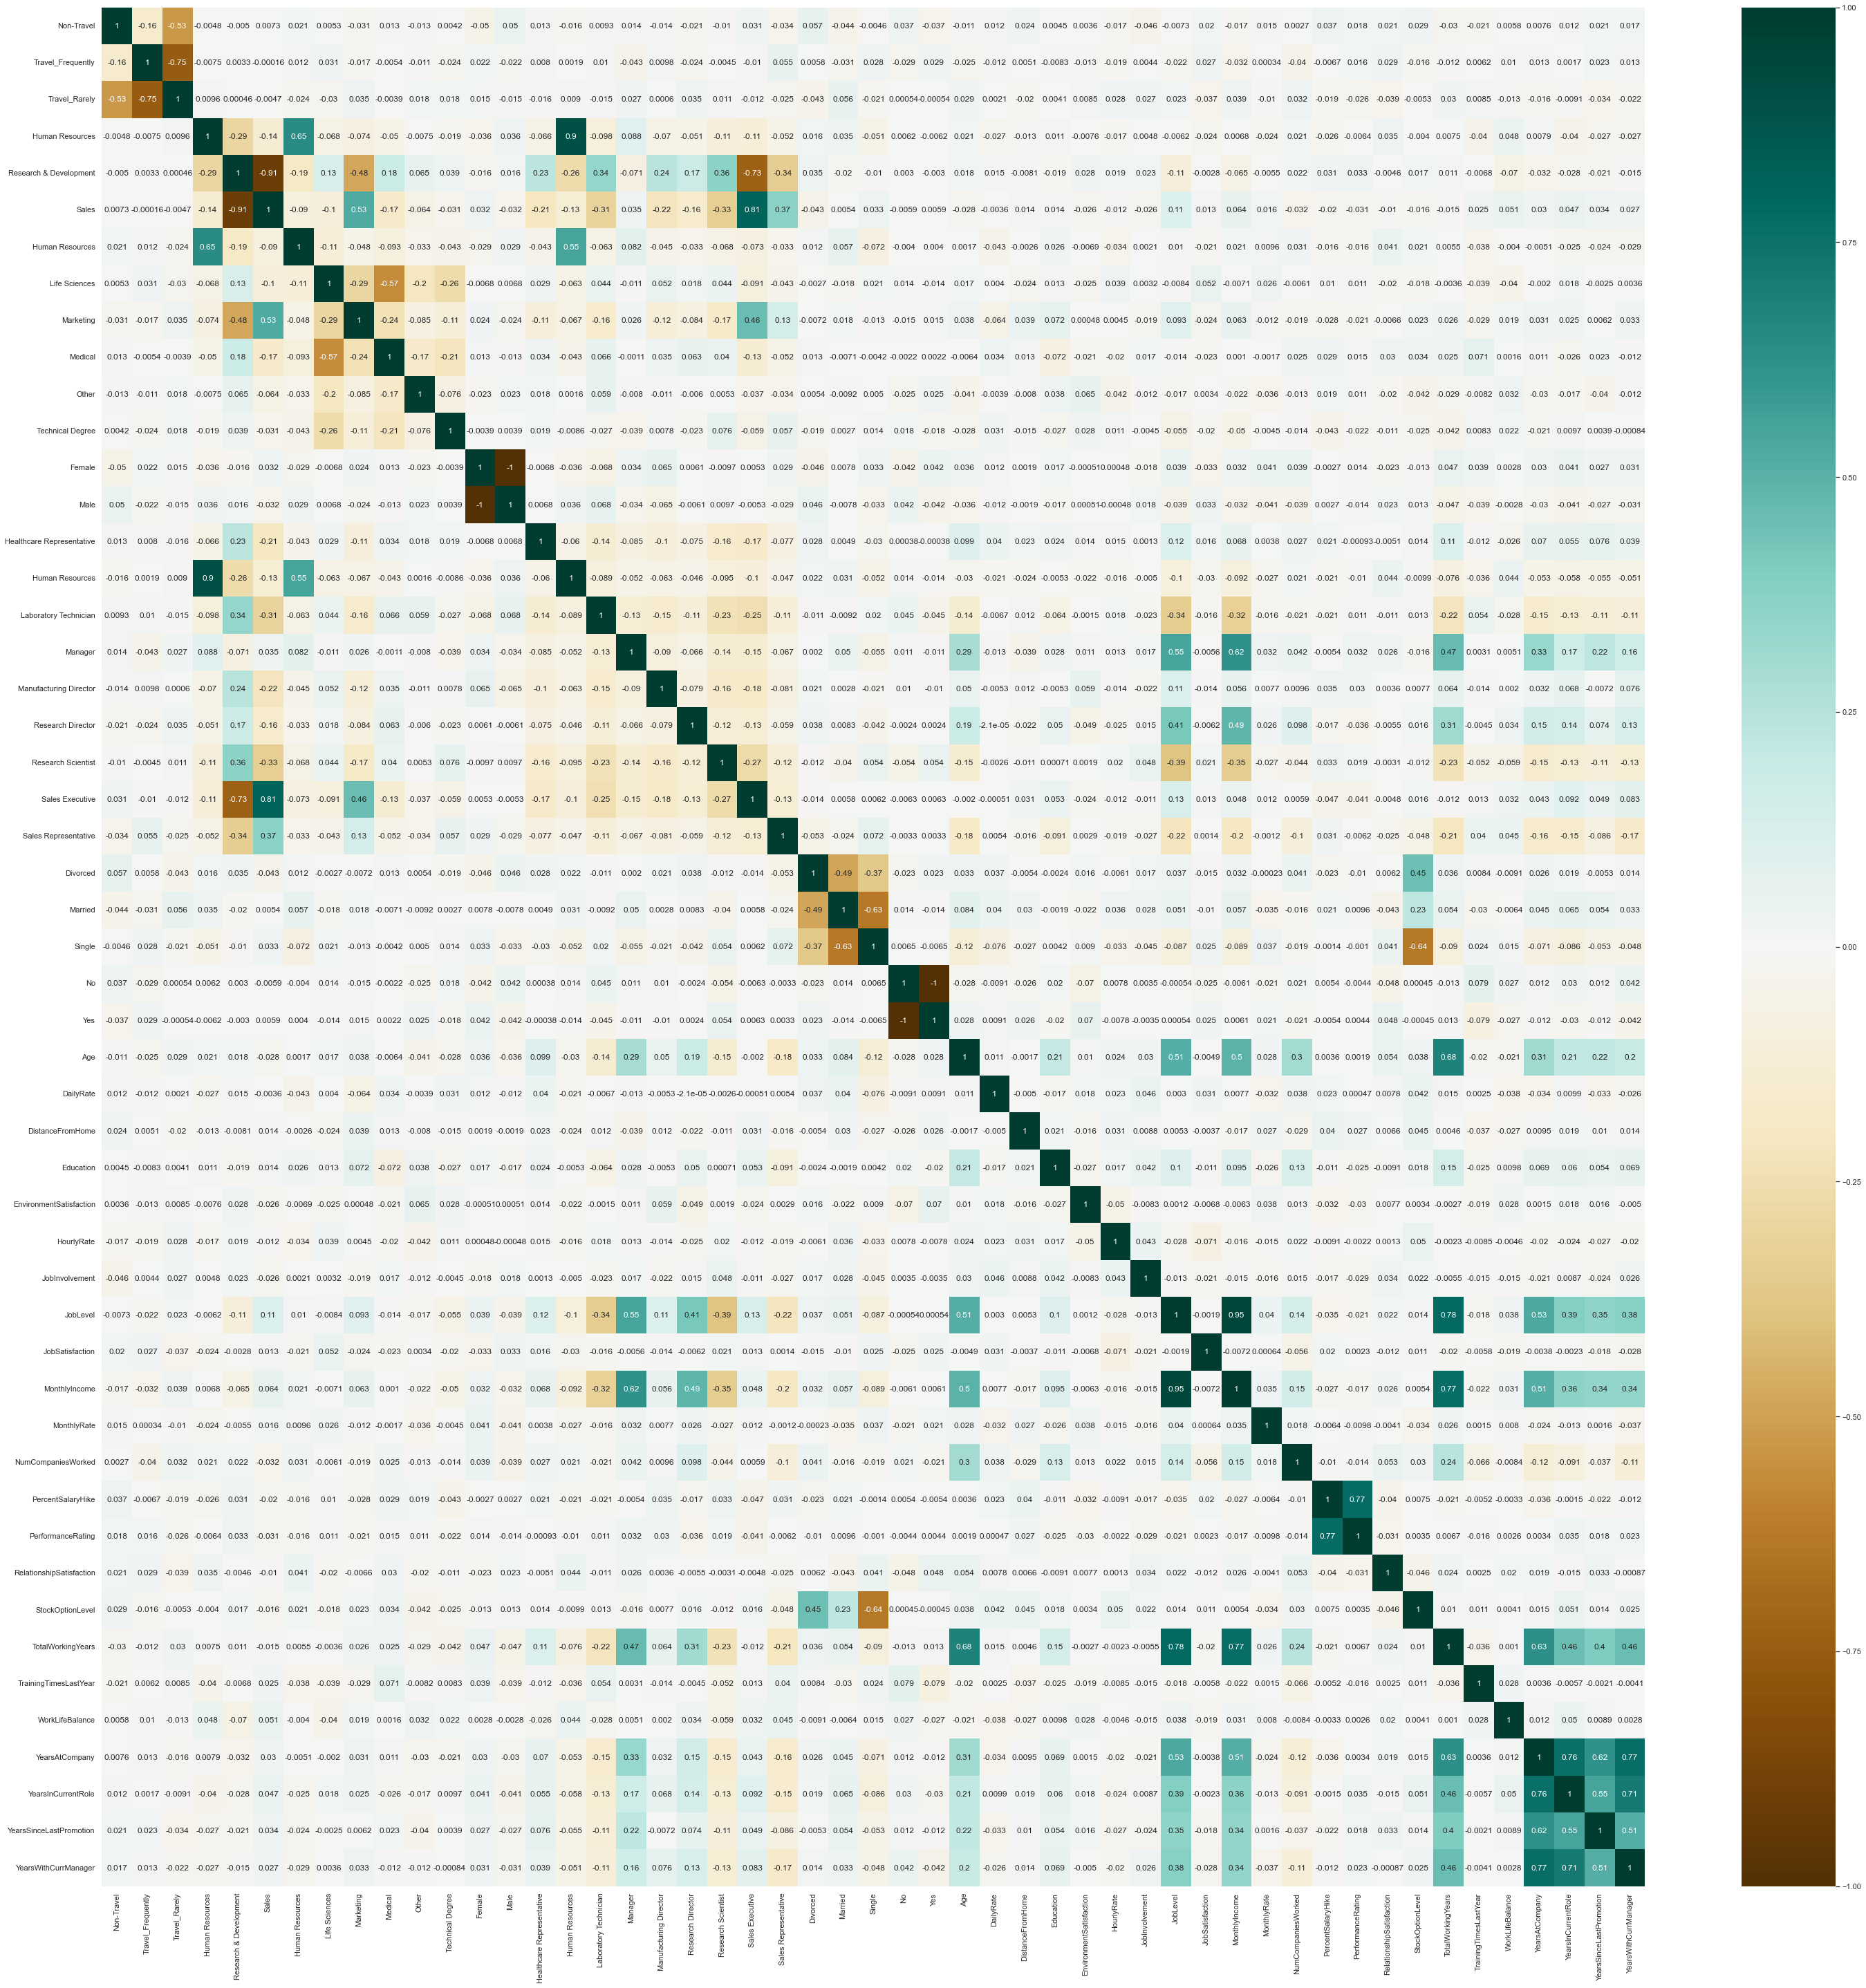

In [107]:
sns.set (rc = {'figure.figsize':(50, 50)})
ax = sns.heatmap(df_final.corr(), annot=True, cmap='BrBG')

In [108]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("model", RandomForestClassifier())])

In [109]:
X = df_final.drop(["Attrition"], axis = 1)
y = df_final[["Attrition"]]

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [111]:
pipe.fit(X_train, y_train.values.ravel())

pipe.score(X_test, y_test)

0.8605442176870748

### Using the base model we ran the following models and achieved the following performance
- Log regression: accuracy of up to 0.86
- Decision tree: accuracy of up to 0.8
- Random forrest: accuracy of up to 0.9

We selected the random classifier in the end which gave us the best performance